# Load Modules


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/collect data

In [3]:
import zipfile

zip_path = "C:/Users/Dharshana/Downloads/archive (2).zip"
extract_path = "brain_tumor_dataset"  # Specify the directory to extract the files

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [9]:
import cv2
import os
import zipfile

dataset_zip_path = r"C:\Users\Dharshana\Downloads\archive (2).zip"
extracted_folder_path = r"C:\Users\Dharshana\Downloads\brain_tumor\Training" 

# Extract the contents of the ZIP file to the specified folder
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

classes = {'no_tumor': 0, 'pituitary_tumor': 1}

X = []  # List to store image data
Y = []  # List to store corresponding labels

for cls in classes:
    pth = os.path.join(extracted_folder_path, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, 0)  # Read the image in grayscale
        img = cv2.resize(img, (200, 200))  # Resize the image to (200, 200)
        X.append(img)  # Append the image to X list
        Y.append(classes[cls])  # Append the corresponding label to Y list


In [10]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [11]:
np.unique(Y)

array([0, 1])

In [12]:

pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [13]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

# Visualize data 

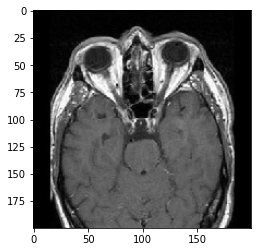

In [14]:
plt.imshow(X[0], cmap='gray')

# Prepare data

In [15]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Split Data 

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [17]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

# Feature Scaling

In [18]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection: PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [21]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

# Train Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [23]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [24]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [25]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [27]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


# Prediction

In [29]:
pred = sv.predict(xtest)

In [30]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [31]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


# TEST MODEL

In [32]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

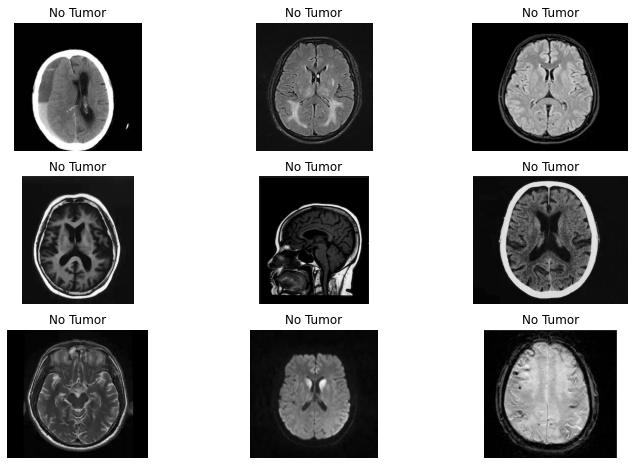

In [34]:
import cv2
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir('C:\\Users\\Dharshana\\Downloads\\brain_tumor\\Testing\\no_tumor')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('C:\\Users\\Dharshana\\Downloads\\brain_tumor\\Testing\\no_tumor\\' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    
    # Replace sv.predict with your prediction code
    p = sv.predict(img1)
    
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

dataset_train_path = r"C:\Users\Dharshana\Downloads\brain_tumor\Training"
dataset_test_path = r"C:\Users\Dharshana\Downloads\brain_tumor\Testing" 

# Continue with the rest of your code...
